<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: José Alvarado Espinoza</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fourier
from PIL import Image

<function matplotlib.pyplot.show(close=None, block=None)>

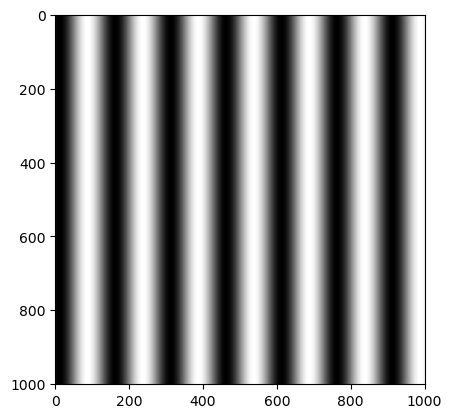

In [2]:
"""
Script basado en "https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/"

"""


x = np.arange(-500, 501, 1)

x, y = np.meshgrid(x, x)

wavelength = 150 # cambia el tamaño de las lineas
grating = np.sin(2 * np.pi * x / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


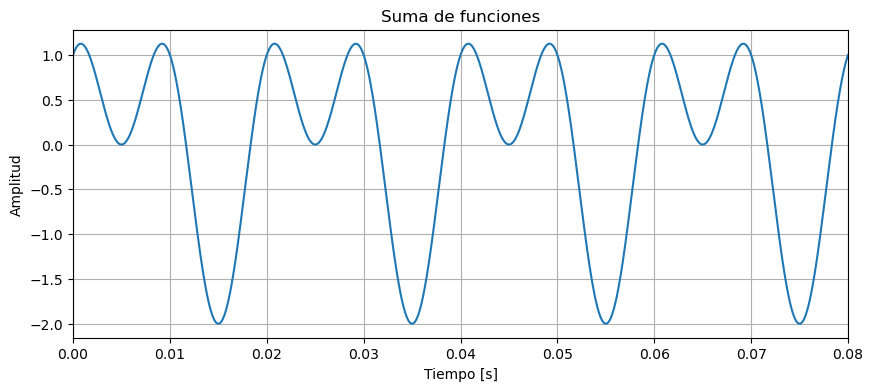

In [3]:
"""
 Crearemos la suma de funciones solicitadas en F_1
"""

t_1 = np.linspace(0, 0.08, 1000) # Tiempo en el que evaluaremos las funciones
fre_1 = 50 # frecuencia 

F_1 = np.sin(2 * np.pi * fre_1 * t_1) + np.cos(2 * 2 * np.pi * fre_1 * t_1)

# Graficamos la función solicitada

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(t_1, F_1)
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Amplitud")
ax.set_xlim(0, 0.08)
ax.set_title("Suma de funciones")

plt.grid()
plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

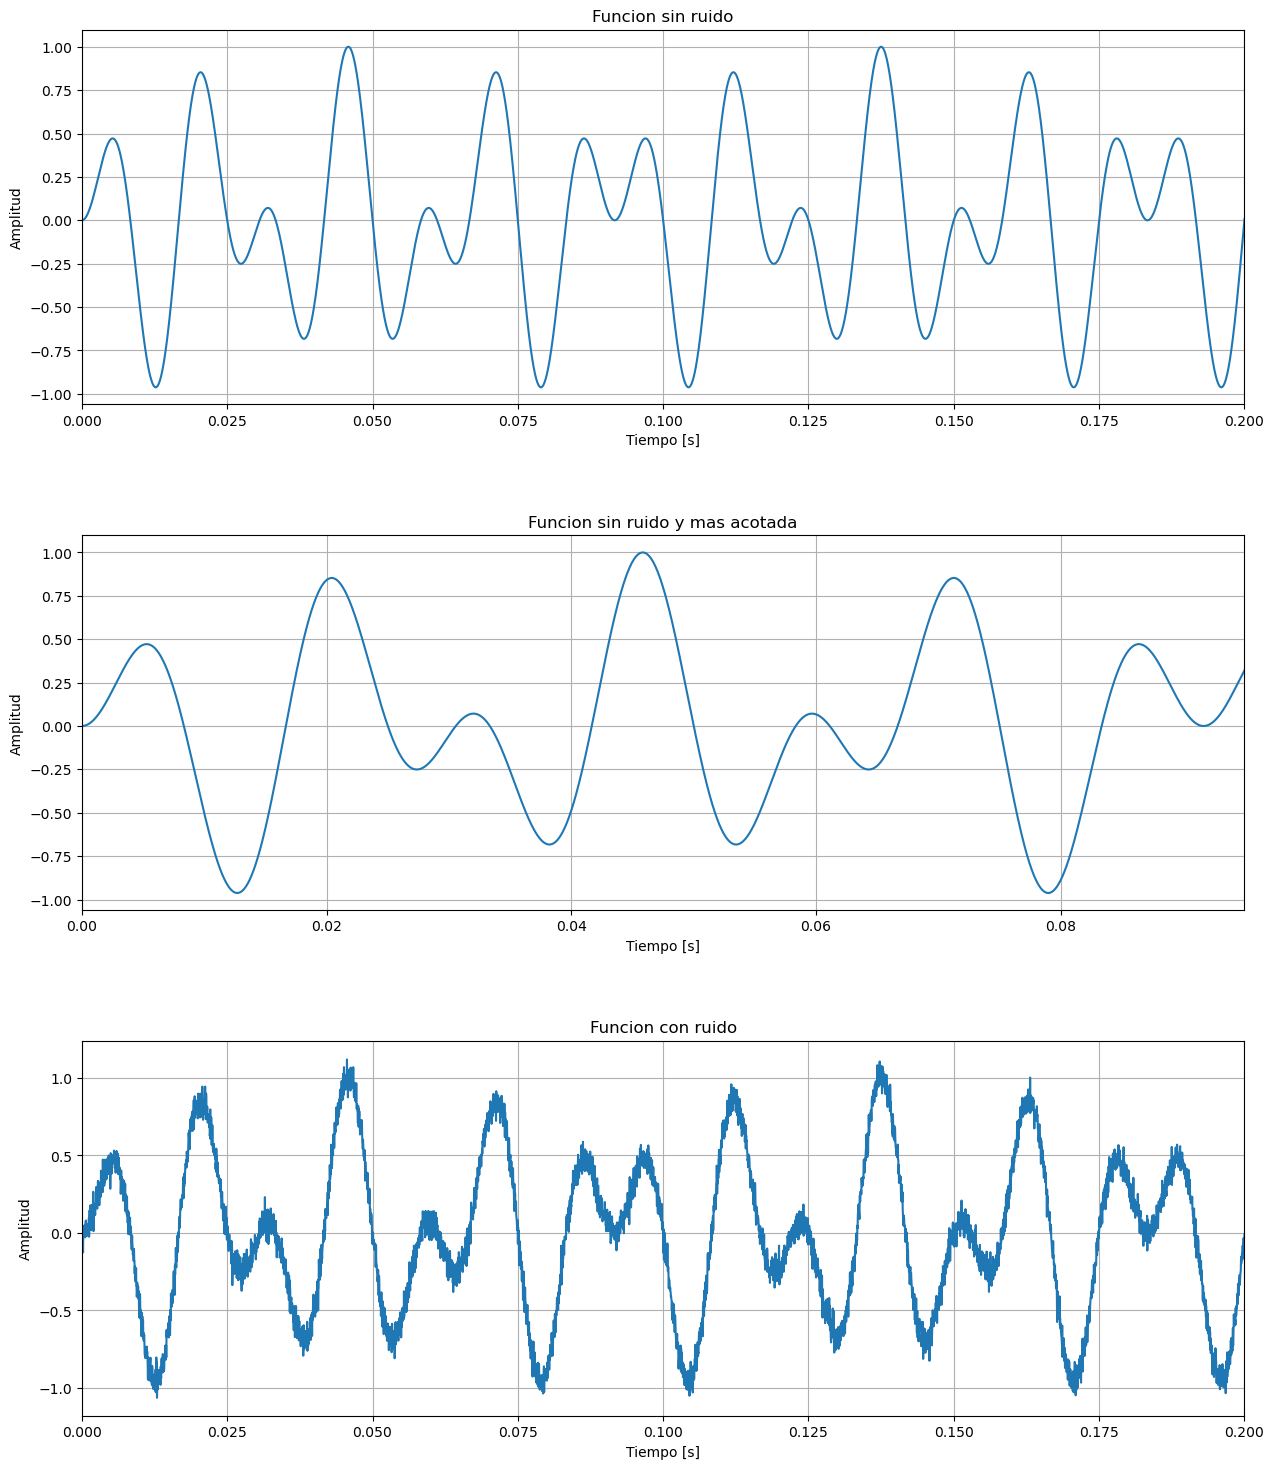

In [4]:
"""
Generamos una señal no pura
"""
fre_2 = 60
t_2 = np.linspace(0, 0.4, 10000)

F_2 = np.sin((2 * np.pi * fre_2 * t_2)) * np.sin(6 * (2 * np.pi * fre_2 * t_2)/22)  

# Ruido gaussinao

# Definir la media y la desviacion estandar

mu, sig = 0 , 0.05

# Ruido gaussiano

ruido_gaus = np.random.normal(mu, sig, 10000)

F_3 = F_2 + ruido_gaus


# Graficamos la funcion solicitada

fig, ax = plt.subplots(3, 1, figsize=(15, 18))
plt.subplots_adjust(hspace = 0.35 ) 

# Grafica sin ruido
ax[0].plot(t_2, F_2)
ax[0].set_xlabel("Tiempo [s]")
ax[0].set_ylabel("Amplitud")
ax[0].set_xlim(0, 0.2)
ax[0].set_title("Funcion sin ruido")
ax[0].grid()

# Grafica ajustada para observar mejor el espectro
ax[1].plot(t_2, F_2)
ax[1].set_xlabel("Tiempo [s]")
ax[1].set_ylabel("Amplitud")
ax[1].set_xlim(0, 0.095)
ax[1].set_title("Funcion sin ruido y mas acotada")
ax[1].grid()

ax[2].plot(t_2, F_3)
ax[2].set_xlabel("Tiempo [s]")
ax[2].set_ylabel("Amplitud")
ax[2].set_xlim(0, 0.2)
ax[2].set_title("Funcion con ruido")
ax[2].grid()


plt.show()

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


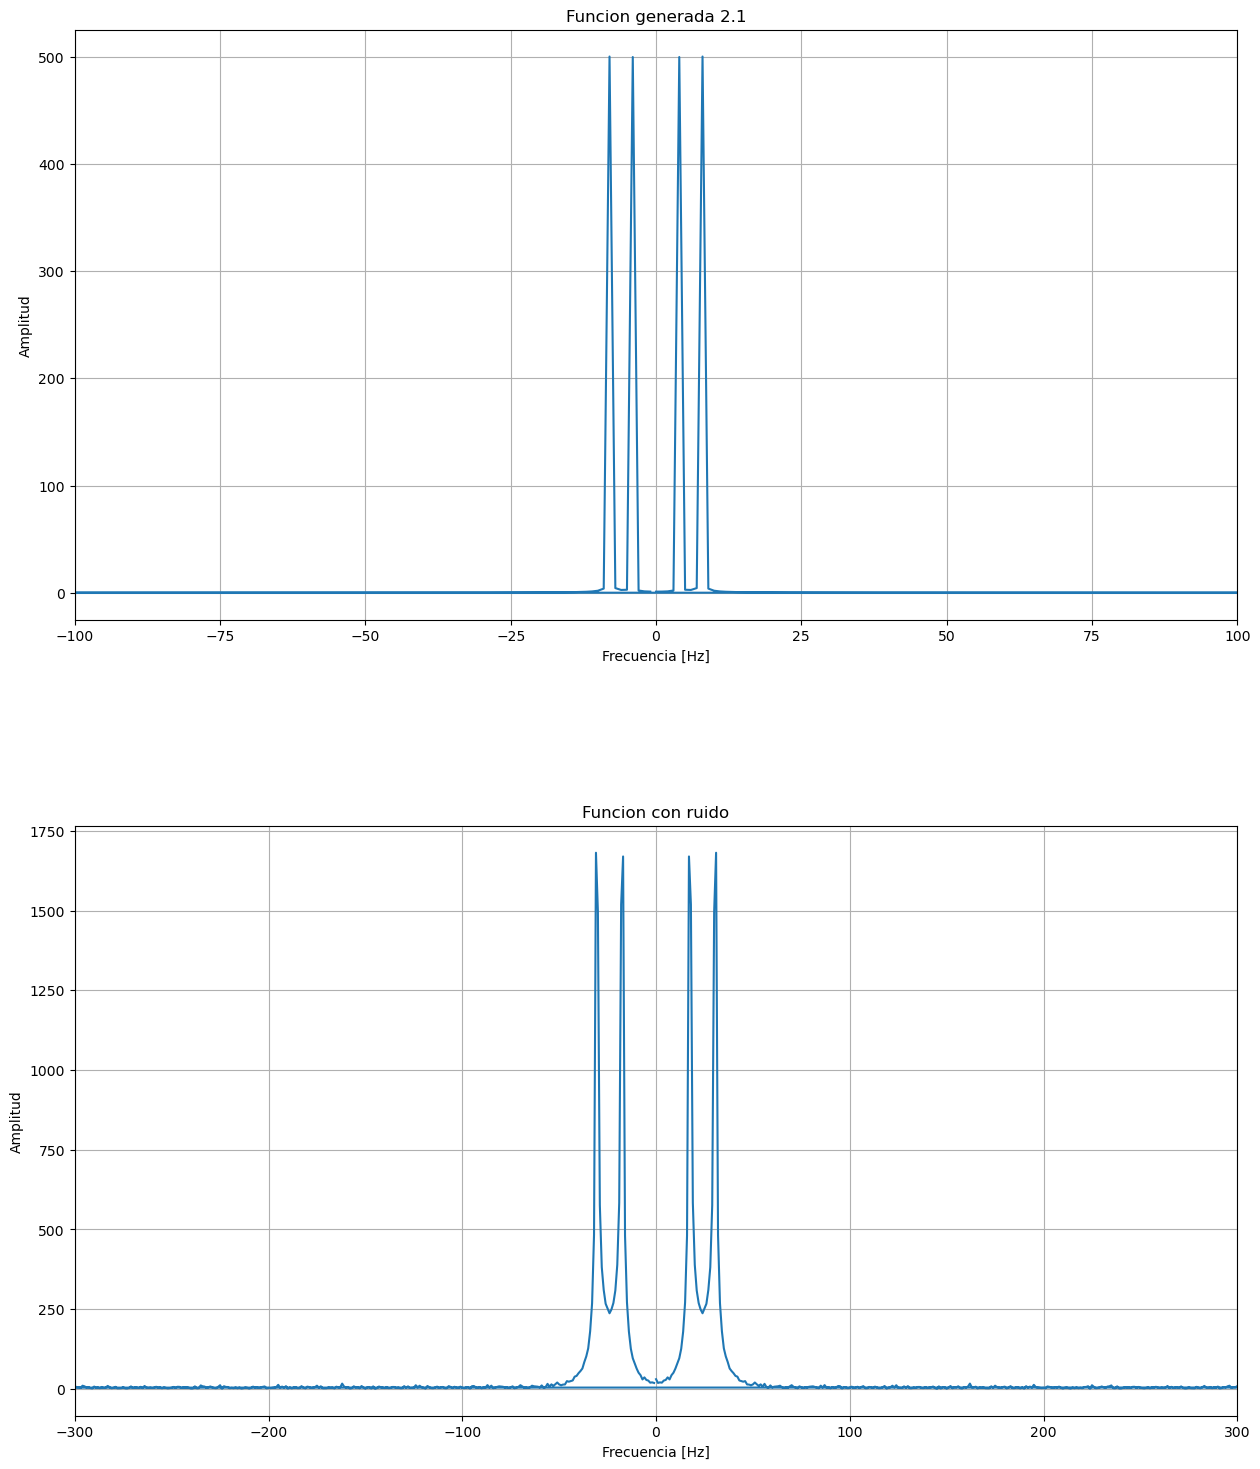

In [5]:
"""
Intento 1 de transformada de fourier utilizando Numpy 
"""

ft_1 = np.fft.ifftshift(F_1) # centramos
ft_1 = np.fft.fft(ft_1) # calculo de transformada de fourier discreta
#ft_1 = np.fft.fftshift(ft_1) # realina la señal 

ft_2 = np.fft.ifftshift(F_3) # Centramos
ft_2 = np.fft.fft(ft_2)
#ft_2 = np.fft.fftshift(ft_2)


# Calcular el eje de frecuencia
dt_1 = 1 / 1000
freq_axis_1 = np.fft.fftfreq(1000, dt_1)

dt_2 = 1 / 10000
freq_axis_2 = np.fft.fftfreq(10000, dt_2)

# Graficamos la funcion solicitada

fig, ax = plt.subplots(2, 1, figsize=(15, 18))
plt.subplots_adjust(hspace = 0.35 ) 

# Grafica sin ruido
ax[0].plot(freq_axis_1, np.abs(ft_1))
ax[0].set_xlabel("Frecuencia [Hz]")
ax[0].set_ylabel("Amplitud")
ax[0].set_xlim(-100, 100)
ax[0].set_title("Funcion generada 2.1")
ax[0].grid()

# Grafica ajustada para observar mejor el espectro
ax[1].plot(freq_axis_2, np.abs(ft_2))
ax[1].set_xlabel("Frecuencia [Hz]")
ax[1].set_ylabel("Amplitud")
ax[1].set_xlim(-300, 300)
ax[1].set_title("Funcion con ruido")
ax[1].grid()



plt.show()

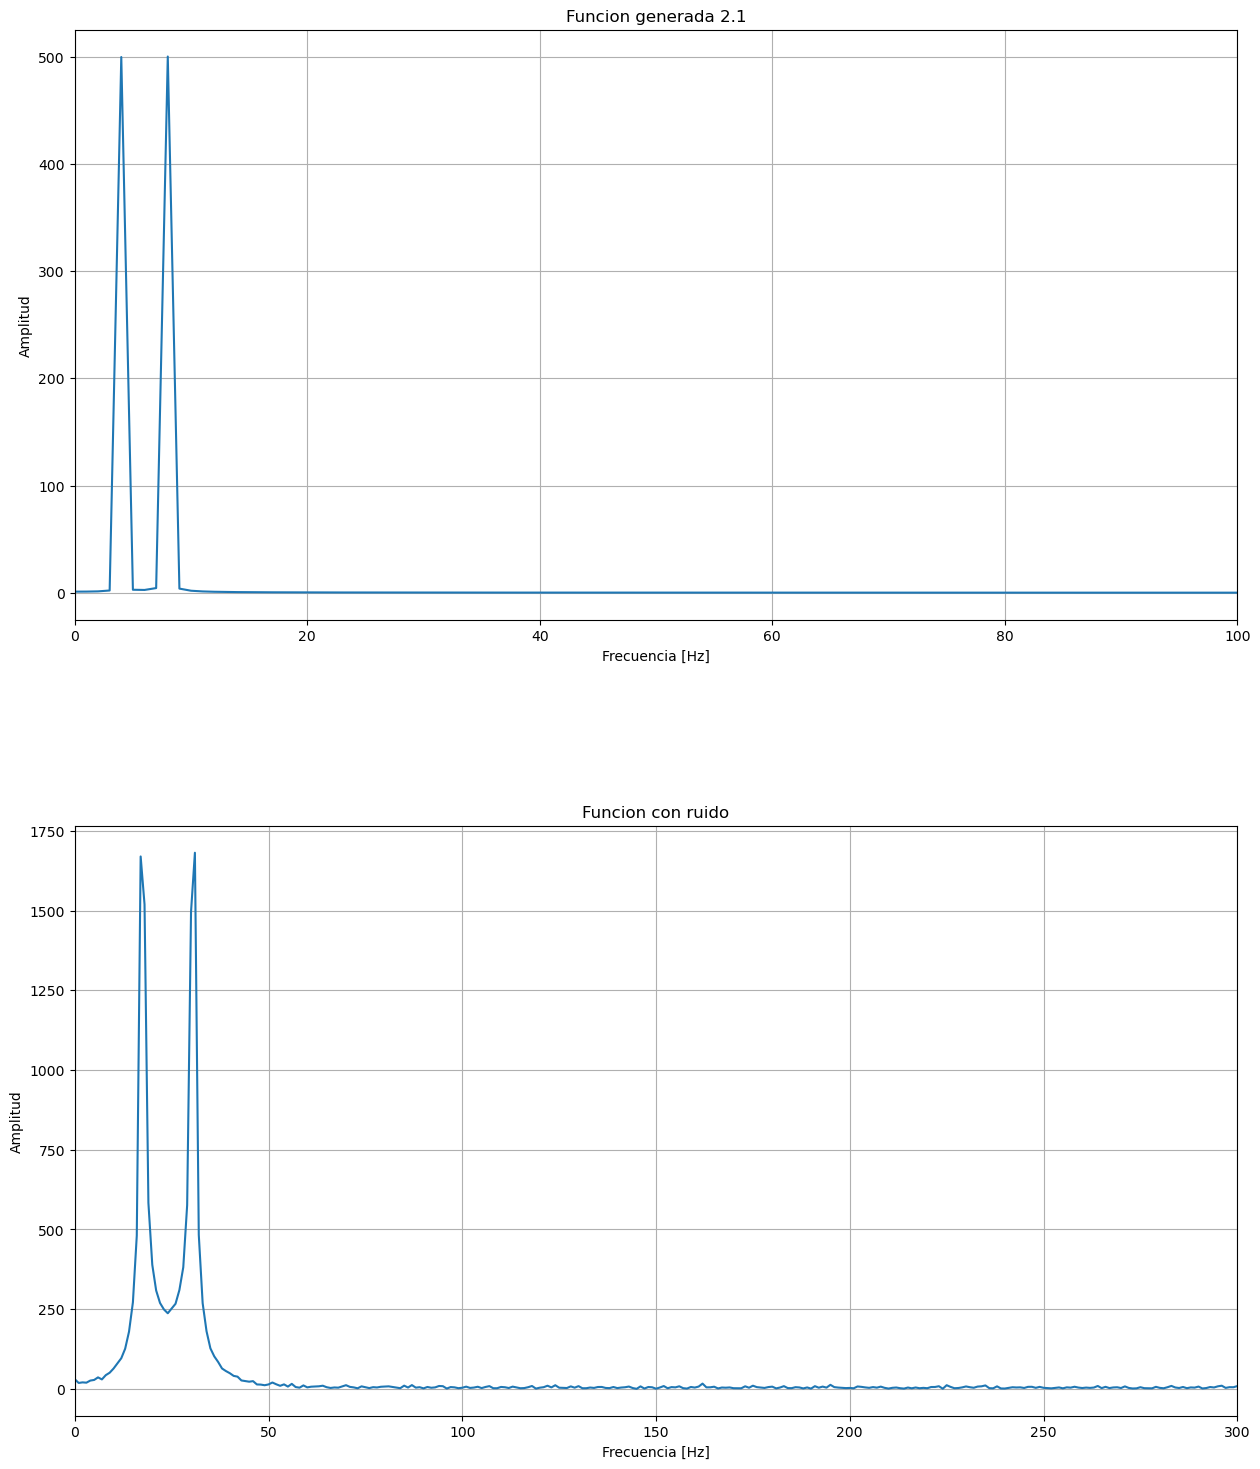

In [6]:
"""
Intento 2
basados en "https://github.com/DavidReveloLuna/ProcesamientoDatos/blob/master/Scripts/7_FFT_TiempoReal.ipynb"
que incluye la libreria Scipy

"""

Ts = 0.001
Fs = 1/Ts
Ts_2 = 0.0001
Fs_2 = 1/Ts_2
vector_freq_1 = Fs * np.arange(0, len(F_1))/len(F_1)
vector_freq_2 = Fs_2 * np.arange(0, len(F_2))/len(F_2)

Transfor_1 = fourier.fft(F_1)
Transfor_2 = fourier.fft(F_3)

M_1 = abs(Transfor_1)
M_2 = abs(Transfor_2)


# Graficamos la funcion solicitada

fig, ax = plt.subplots(2, 1, figsize=(15, 18))
plt.subplots_adjust(hspace = 0.35 ) 

# Grafica sin ruido
ax[0].plot(vector_freq_1, M_1)
ax[0].set_xlabel("Frecuencia [Hz]")
ax[0].set_ylabel("Amplitud")
ax[0].set_xlim(0, 100)
ax[0].set_title("Funcion generada 2.1")
ax[0].grid()

# Grafica ajustada para observar mejor el espectro
ax[1].plot(vector_freq_2, M_2)
ax[1].set_xlabel("Frecuencia [Hz]")
ax[1].set_ylabel("Amplitud")
ax[1].set_xlim(0, 300)
ax[1].set_title("Funcion con ruido")
ax[1].grid()



plt.show()

### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

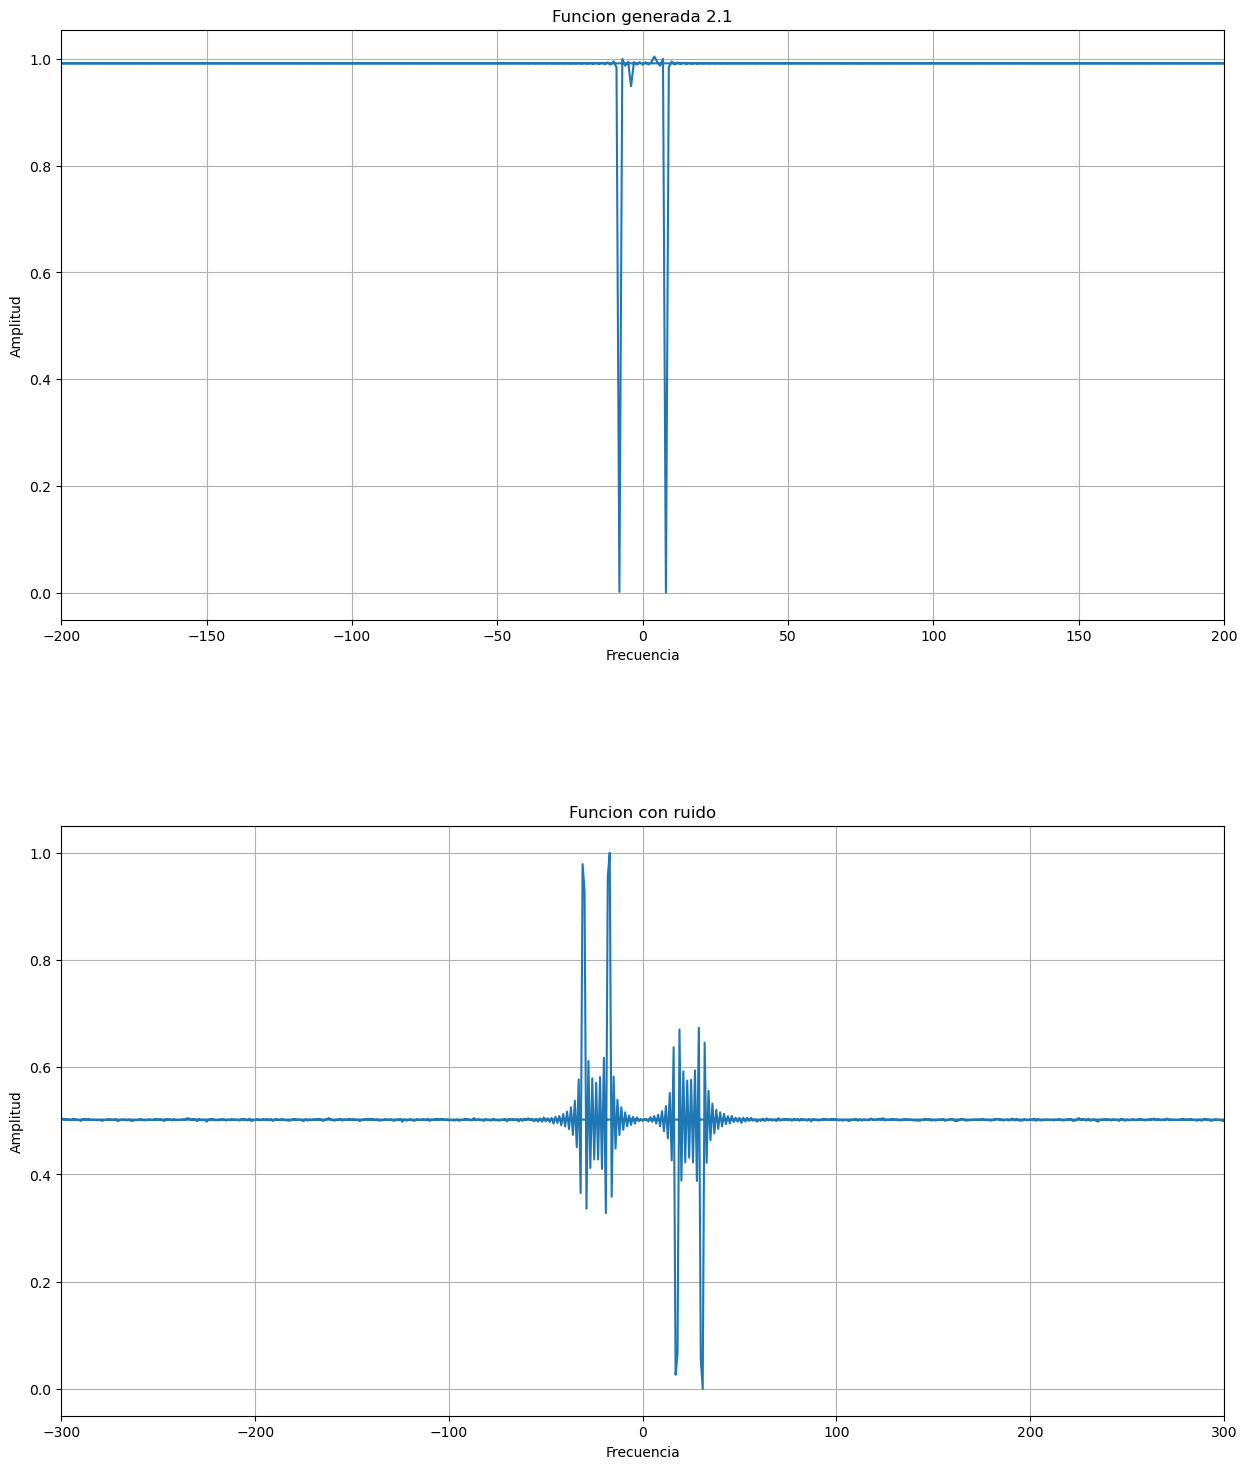

In [11]:
"""
Utilizaremos una formula para normalizar
"""

ft_1norm = 1 + ((ft_1 - min(ft_1))*((-1)/(max(ft_1) - min(ft_1))))
ft_2norm = 1 + ((ft_2 - min(ft_2))*((-1)/(max(ft_2) - min(ft_2))))


# Graficamos la funcion solicitada

fig, ax = plt.subplots(2, 1, figsize=(15, 18))
plt.subplots_adjust(hspace = 0.35 ) 

# Grafica sin ruido
ax[0].plot(freq_axis_1, ft_1norm)
ax[0].set_xlabel("Frecuencia")
ax[0].set_ylabel("Amplitud")
ax[0].set_xlim(-200, 200)
ax[0].set_title("Funcion generada 2.1")
ax[0].grid()

# Grafica ajustada para observar mejor el espectro
ax[1].plot(freq_axis_2, ft_2norm)
ax[1].set_xlabel("Frecuencia")
ax[1].set_ylabel("Amplitud")
ax[1].set_xlim(-300, 300)
ax[1].set_title("Funcion con ruido")
ax[1].grid()



plt.show()

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

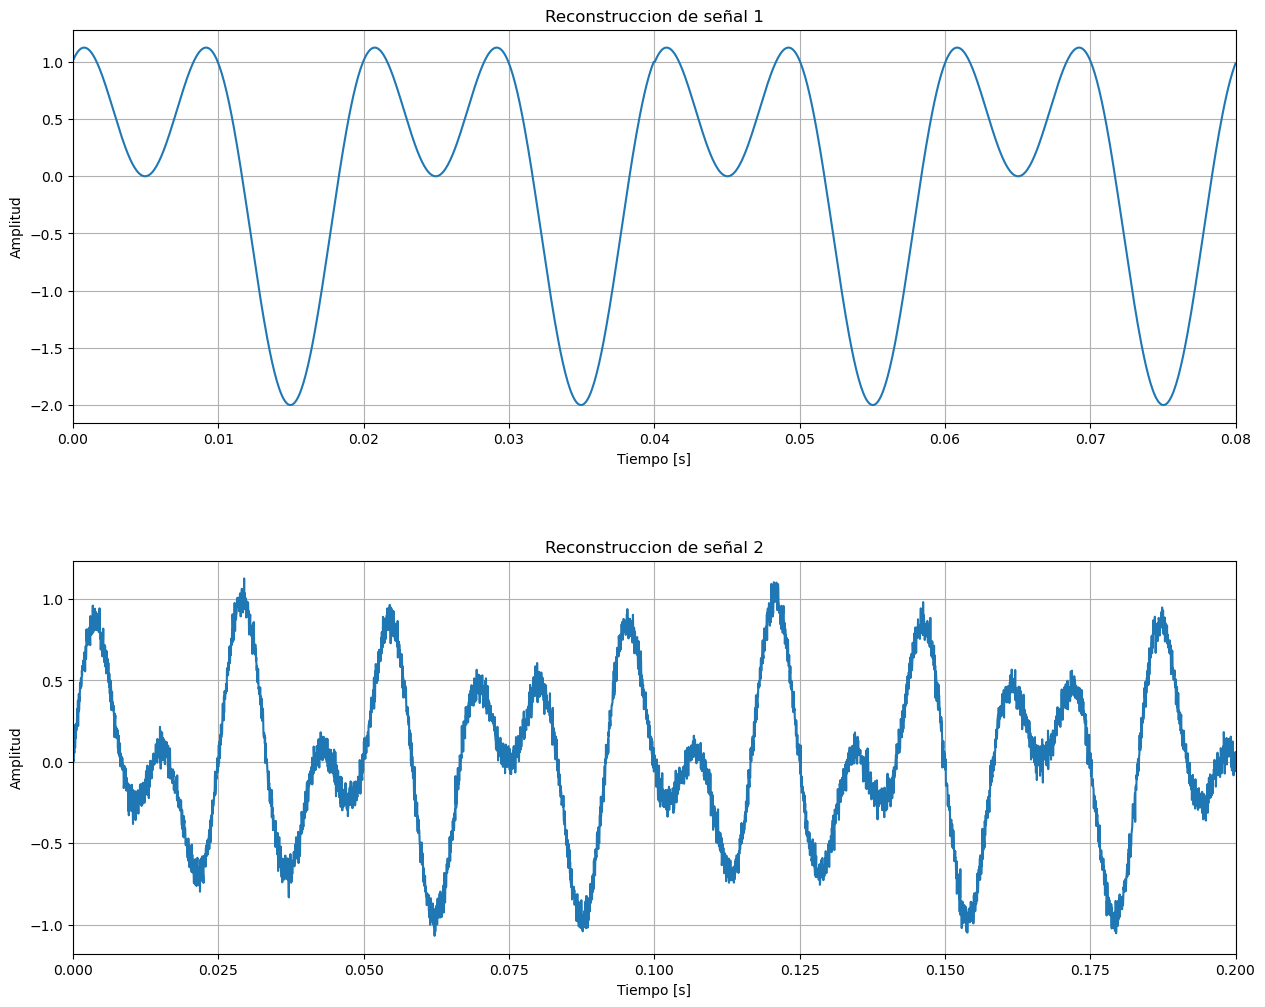

In [8]:



x_1 = np.fft.ifft(ft_1)
x_1 = np.fft.ifftshift(x_1)
x_1 = np.fft.fftshift(x_1)

x_2 = np.fft.ifft(ft_2)
x_2 = np.fft.ifftshift(x_2)
x_2 = np.fft.fftshift(x_2)

# Graficamos la funcion solicitada

fig, ax = plt.subplots(2, 1, figsize=(15, 12))
plt.subplots_adjust(hspace = 0.35 ) 

# Grafica sin ruido
ax[0].plot(t_1, x_1)
ax[0].set_xlabel("Tiempo [s]")
ax[0].set_ylabel("Amplitud")
ax[0].set_xlim(0, 0.08)
ax[0].set_title("Reconstruccion de señal 1")
ax[0].grid()

# Grafica ajustada para observar mejor el espectro
ax[1].plot(t_2, x_2)
ax[1].set_xlabel("Tiempo [s]")
ax[1].set_ylabel("Amplitud")
ax[1].set_xlim(0, 0.2)
ax[1].set_title("Reconstruccion de señal 2")
ax[1].grid()

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

[[1.         1.03073555 1.14345476 ... 1.47122341 1.14345476 1.03073555]
 [1.03073555 1.03350297 1.1026837  ... 1.72421595 1.25451525 1.09132859]
 [1.14345476 1.1026837  1.10815829 ... 2.22782456 1.5068193  1.25451525]
 ...
 [1.47122341 1.72421595 2.22782456 ... 0.67139174 1.13673026 1.30866859]
 [1.14345476 1.25451525 1.5068193  ... 1.13673026 1.10815829 1.1026837 ]
 [1.03073555 1.09132859 1.25451525 ... 1.30866859 1.1026837  1.03350297]]


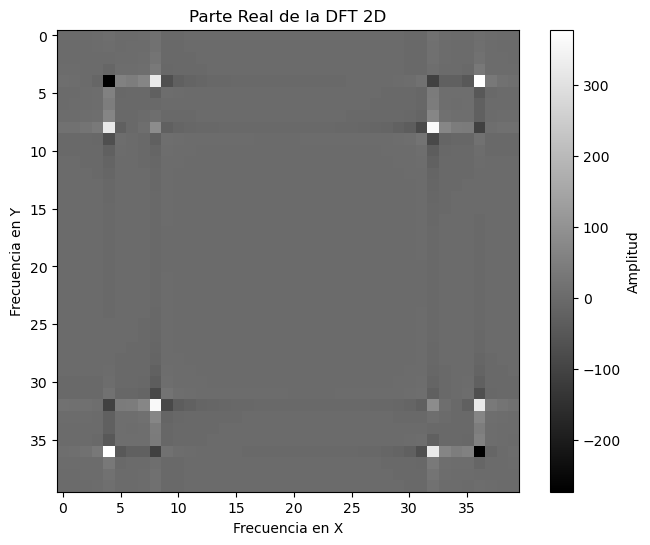

In [9]:
"""
Intento 1 con cantidad de muestras de señal reducida para amortiguar el tiempo de ciclos for
"""
def josefourier1(entrada):
    M, N = entrada.shape
    arreglo = np.zeros((M, N),dtype = complex)
    
    for a in range(M):
        for b in range(N):
            for c in range(M):
                for d in range(N):
                    arreglo[a, b] += entrada[c, d] * np.exp(-2j * np.pi * (a * c / M + b * d / N))
                    
    return arreglo

# Crear la señal F_1 
t_1 = np.linspace(0, 0.08, 40)
fre_1 = 50
F_1 = np.sin(2 * np.pi * fre_1 * t_1) + np.cos(2 * 2 * np.pi * fre_1 * t_1)

señal_2D_1 = np.outer(F_1, F_1)
señal_2D_resultante_1 = josefourier1(señal_2D_1)
señal_2D_real_1 = np.real(señal_2D_resultante_1)


print(np.real(señal_2D_real_1))


# Crear una figura y un eje
plt.figure(figsize=(8, 6))
plt.imshow(señal_2D_real_1, cmap = "gray", origin = "upper")

# Configurar etiquetas y título
plt.xlabel("Frecuencia en X")
plt.ylabel("Frecuencia en Y")
plt.title("Parte Real de la DFT 2D")

# Mostrar la barra de colores
plt.colorbar(label = "Amplitud")

# Mostrar la gráfica
plt.show()


[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.98768834 0.95105652 ... 0.89100652 0.95105652 0.98768834]
 [1.         0.95105652 0.80901699 ... 0.58778525 0.80901699 0.95105652]
 ...
 [1.         0.89100652 0.58778525 ... 0.15643447 0.58778525 0.89100652]
 [1.         0.95105652 0.80901699 ... 0.58778525 0.80901699 0.95105652]
 [1.         0.98768834 0.95105652 ... 0.89100652 0.95105652 0.98768834]]


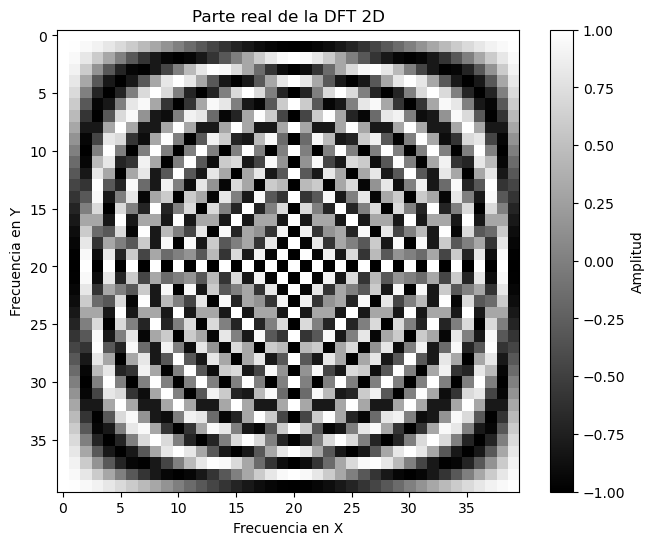

In [10]:
"""
Intento 2 reajustando la funcion
"""
def josefourier2(entrada):
    M, N = entrada.shape
    arreglo = np.zeros((M, N), dtype=complex)
    
    exp_terms = np.exp(-2j * np.pi * np.arange(M)[:, np.newaxis] * np.arange(N) / M)
    
    for a in range(M):
        for b in range(N):
            arreglo[a, b] = np.sum(entrada * exp_terms[a, b])
            
    return arreglo

# Crear la señal F_1
t_1 = np.linspace(0, 0.08, 40)
fre_1 = 50
F_1 = np.sin(2 * np.pi * fre_1 * t_1) + np.cos(2 * 2 * np.pi * fre_1 * t_1)

señal_2D_2 = np.outer(F_1, F_1)
señal_2D_resultante_2 = josefourier2(señal_2D_2)
señal_2D_real_2 = np.real(señal_2D_resultante_2)


print(np.real(señal_2D_real_2))


# Crear una figura y un eje
plt.figure(figsize=(8, 6))
plt.imshow(señal_2D_real_2, cmap = "gray", origin = "upper")

# Configurar etiquetas y título
plt.xlabel("Frecuencia en X")
plt.ylabel("Frecuencia en Y")
plt.title("Parte real de la DFT 2D")

# Mostrar la barra de colores
plt.colorbar(label = "Amplitud")

# Mostrar la gráfica
plt.show()

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

Luego de generar la señal:
$$ F(x) = sin(2 \cdot \pi \cdot f \cdot t) + sin(0.5454 \cdot \pi \cdot f \cdot t) + ruido $$

para luego realizar su analisis tanto en el dominio de la frecuencia como del tiempo, en el analisis del tiempo se puede observar como deforma nuestra señal y en el analisis en frecuencia se puede observar que el ruido se dezplasa a la base de la grafica similar al "piso de ruido" que se observaria en el osciloscopio.

El uso de la transformada de fourier para las funciones de esta actividad, dan la posibilidad de trabajar con la señal en el dominio de la frecuencia lo que nos muestra cuales son sus armonicas mas importantes.


Se inicia la actividad con el trabajo de sinusoidal grating utilizado para replicar imagenes con sinusoidales de diferentes frecuencias y angulos de desfase, para este inicio de la actividad nos basamos por sobretodo en thepythoncodingbook entregado en las referencias de la actividad.

luego se diseñaron y dos señales una con ruido gaussiano añadido y otra sin, para observar su comportamiento en el dominio del tiempo.

Finalmente utilizando distintas librerias se transformaron las señales diseñadas en la actividad dos al dominio de la frecuencia con la transformada de fourier, para finalmente diseñar un codigo que haga el trabajo de una DFT 2D sin la necesidad de librerias, este ultimo codigo genero un par de problemas, ya que al ser numeros tan grandes y ser la DFT una sumatoria tan grande de valores utilizar las señales completas resulta sumamente extenso por esto se diseño el codigo y se probo con una cantidad acotada de muestras.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html
    
[Transformada de fourier]https://gist.github.com/astrojuanlu/3804365
    
[FFT]https://github.com/DavidReveloLuna/ProcesamientoDatos